# Завдання
На основі файлу `banking.csv` виконати наступні дії:
1. Сформувати тестовий та тренувальний датасет (розмір вибірки 0.3).
2. Застосувати логістичну регресію для прогнозування цільової метрики (ймовірність того, що клієнт відкриє вклад у банку).
3. Оцінити модель за допомогою матриці похибок, матрики precision, recall, F1-score та побудувати ROC-AUC криву.

## Рішення

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

1. Сформувати тестовий та тренувальний датасет (розмір вибірки 0.3).

In [67]:
# Завантаження даних та відбір лише числових змінних
data = pd.read_csv('banking.csv')
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data = data[numeric_cols]
data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [68]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [69]:
# Визначення змінної цільової метрики та розбиття на тренувальний та тестовий датасети
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

2. Застосувати логістичну регресію для прогнозування цільової метрики (ймовірність того, що клієнт відкриє вклад у банку),

In [70]:
# Застосування логістичної регресії та оцінка моделі
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

3. Оцінити модель за допомогою матриці похибок, матрики precision, recall, F1-score та побудувати ROC-AUC криву.

<AxesSubplot: >

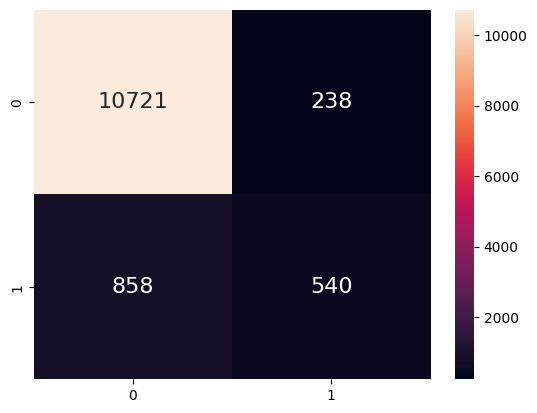

In [71]:
# Матриця похибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 16}, fmt='g')

In [72]:
# Precision, recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10959
           1       0.69      0.39      0.50      1398

    accuracy                           0.91     12357
   macro avg       0.81      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



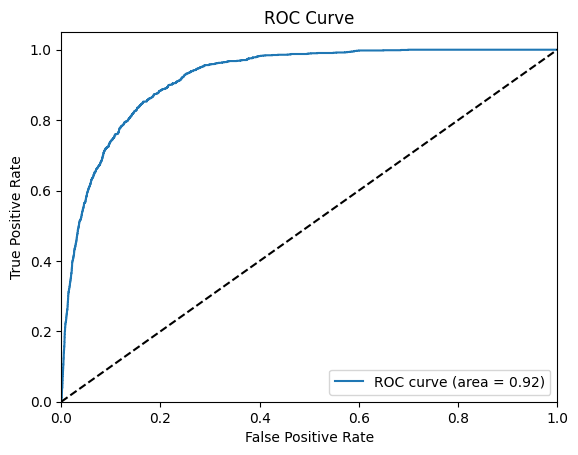

In [73]:
# ROC-AUC крива
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Висновоки
1. Матриця похибок показує, що модель правильно класифікувала 10721 негативних і 540 позитивних значень. Одночасно неправильно класифікувала 858 значень, як негативні і 238 як позитивні.
2. Precision показує, що модель правильно класифікувала 93% негативних значень та всього 69% позитивних.
3. Recall показує, що модель правильно визначила 98% негативних значень та 39% позитивних.
4. F1-score показує, що в середнє гармонійне між Precision та Recall.
5. Низька точність на позитивних значеннях пояснюється дисбалансом класів - у наборі надих дуже багато негативних міток і мало позитивних.